# Naked Call

This [strategy](https://www.investopedia.com/articles/optioninvestor/122701.asp) consists of a trader selling a number of call options for which s/he does not own the underlying asset.

If the stock price remains below the strike price of the call options at expiration, the trader pockets the option premium.

On the other hand, if the stock price rises above the strike price, the losses are unlimited. Naked call is one of the riskiest option strategies.

**Caveat: Options are very risky derivatives and, like any other type of financial vehicle, trading options requires due diligence. Transactions shown as examples of trading strategies with options in this notebook are not recommendations.**

In [1]:
from __future__ import print_function

import datetime as dt
import sys

from optionlab import VERSION, run_strategy, Inputs, plot_pl

%matplotlib inline

In [2]:
print("Python version: %s" % sys.version)
print("OptionLab version: %s" % VERSION)

Python version: 3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
OptionLab version: 1.4.1


The underlying asset is Apple stock (ticker: APPL). We consider the stock price on January 18, 2021. The strategy involves  selling 100 calls with a strike of 175. We collect a premium of 1.15 per call option.

In [3]:
stock_price = 164.04
volatility = 0.272
start_date = dt.date(2021, 11, 22)
target_date = dt.date(2021, 12, 17)
interest_rate = 0.0002
min_stock = stock_price - round(stock_price * 0.5, 2)
max_stock = stock_price + round(stock_price * 0.5, 2)
profit_target = 100.0
loss_limit = -100.0
model = "black-scholes"
strategy = [
    {"type": "call", "strike": 175.00, "premium": 1.15, "n": 100, "action": "sell"}
]

inputs = Inputs(
    stock_price=stock_price,
    start_date=start_date,
    target_date=target_date,
    volatility=volatility,
    interest_rate=interest_rate,
    min_stock=min_stock,
    max_stock=max_stock,
    profit_target=profit_target,
    loss_limit=loss_limit,
    model=model,
    strategy=strategy,
)

In [4]:
%%time
out = run_strategy(inputs)

CPU times: total: 156 ms
Wall time: 160 ms


Profit/Loss diagram:
--------------------
The vertical green dashed line corresponds to the position of the stock's spot price. The right and left arrow markers indicate the strike prices of calls and puts, respectively, with blue representing long and red representing short positions. The blue dashed line represents the profit target level. The red dashed line represents the loss limit level.


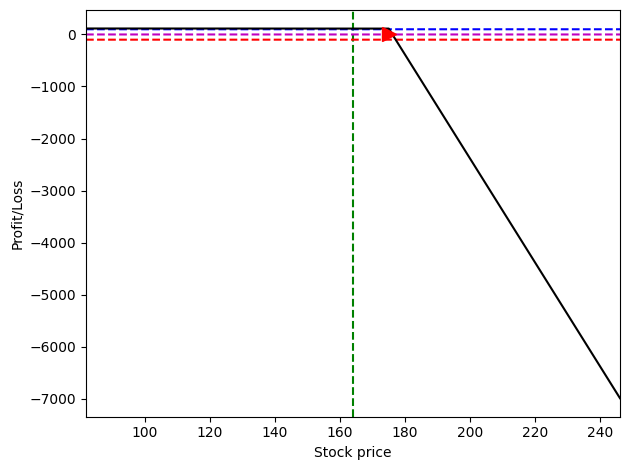

In [5]:
plot_pl(out)

In [6]:
print(f"Maximum loss: {abs(out.minimum_return_in_the_domain):.2f}")
print(f"Maximum profit: {out.maximum_return_in_the_domain:.2f}")
print("Profitable stock price range:")

for low, high in out.profit_ranges:
    print(f"      {low:.2f} ---> {high:.2f}")

print(f"Probability of Profit (PoP): {out.probability_of_profit * 100.0:.1f}%")
print(f"Expected profit: {out.expected_profit:.2f}")
print(f"Expected loss: {out.expected_loss:.2f}")
print(
    f"Probability of reaching {profit_target:.2f} or more: {out.probability_of_profit_target * 100.0:.1f}%"
)
print(
    f"Probability of losing {abs(loss_limit)} or more: {out.probability_of_loss_limit * 100.0:.1f}%"
)

Maximum loss: 6992.00
Maximum profit: 115.00
Profitable stock price range:
      0.00 ---> 176.14
Probability of Profit (PoP): 83.9%
Expected profit: 115.00
Expected loss: -707.00
Probability of reaching 100.00 or more: 82.0%
Probability of losing 100.0 or more: 14.3%
